数据集来源：
https://gitcode.com/open-source-toolkit/6e5f9

代码
https://www.cnblogs.com/lushuang55/p/17405918.html

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing#导入sklearn的预处理模块

import torch
import random

# 设置随机种子
seed = 42
torch.manual_seed(seed)  # 设置 PyTorch 的随机种子
np.random.seed(seed)     # 设置 NumPy 的随机种子
random.seed(seed)        # 设置 Python 内置的随机种子



In [83]:
data = pd.read_csv('data/temps.csv')
data.head(10)
data.shape

(348, 9)

In [84]:
# import datetime

# years = data['year'].values
# months = data['month'].values
# days = data['day'].values

# # datetime格式
# dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
# dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

In [85]:
# 标签
labels = np.array(data['actual'])

# 在特征中去掉标签
features= data.drop('actual', axis = 1)

# 独热编码：将week列的字符串转换成数值
features = pd.get_dummies(features)

# 名字单独保存一下，以备后患
feature_list = list(features.columns)

# 转换成合适的格式
features = np.array(features)

In [86]:
# 标准化操作：数值浮动范围化小
input_features = preprocessing.StandardScaler().fit_transform(features)
# labels = preprocessing.StandardScaler().fit_transform(labels.reshape(-1, 1))
print(input_features[0])

[ 0.         -1.5678393  -1.65682171 -1.48452388 -1.49443549 -1.3470703
 -1.98891668  2.44131112 -0.40482045 -0.40961596 -0.40482045 -0.40482045
 -0.41913682 -0.40482045]


torch.Size([348, 14]) torch.Size([348])
epoch: 0/1000 loss: 3080.19189453125
epoch: 100/1000 loss: 623.6213989257812
epoch: 200/1000 loss: 373.94891357421875
epoch: 300/1000 loss: 307.33331298828125
epoch: 400/1000 loss: 271.6849060058594
epoch: 500/1000 loss: 247.43043518066406
epoch: 600/1000 loss: 229.2248992919922
epoch: 700/1000 loss: 214.74313354492188
epoch: 800/1000 loss: 202.7823486328125
epoch: 900/1000 loss: 192.63267517089844


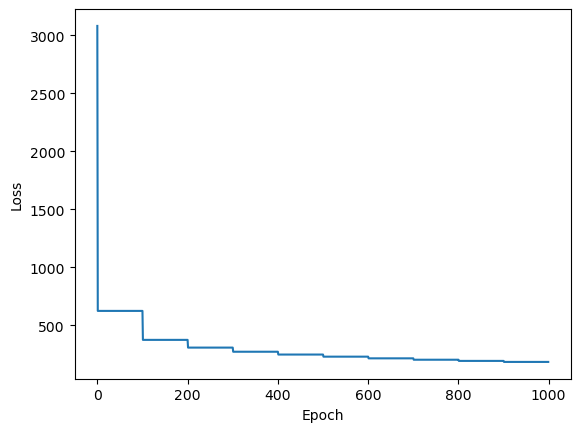

In [87]:
x = torch.tensor(input_features, dtype=torch.float32)  # Changed to float32 to match other tensors
y = torch.tensor(labels, dtype=torch.float32)  # Changed to float32 to match other tensors
print(x.shape, y.shape)

weights = torch.randn((14, 128), dtype=torch.float32, requires_grad=True)  # Changed to float32
biases = torch.randn(128, dtype=torch.float32, requires_grad=True)  # Changed to float32
weights2 = torch.randn((128, 1), dtype=torch.float32, requires_grad=True)  # Changed to float32
biases2 = torch.randn(1, dtype=torch.float32, requires_grad=True)  # Changed to float32

learning_rate = 0.001 #学习率
losses = []#损失
epochs = 1000 #迭代次数

for i in range(epochs): #迭代10000次
    hidden = x.mm(weights) + biases #矩阵乘法
    hidden = torch.relu(hidden) #激活函数
    prediction = hidden.mm(weights2) + biases2 #输出层
    loss = torch.mean((prediction - y.view(-1, 1)) ** 2) #均方误差损失函数
    losses.append(loss.data.numpy()) #记录损失
    if i % 100 == 0: #每100次输出
        print(f'epoch: {i}/{epochs}', f'loss: {loss.data.numpy()}') #输出损失
        loss.backward()
        
        # 更新参数
        weights.data -= learning_rate * weights.grad.data 
        biases.data -= learning_rate * biases.grad.data
        weights2.data -= learning_rate * weights2.grad.data
        biases2.data -= learning_rate * biases2.grad.data
        
        # 梯度清零
        weights.grad.data.zero_() 
        biases.grad.data.zero_()
        weights2.grad.data.zero_()
        biases2.grad.data.zero_()
        
# 绘制损失曲线
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()
plt.close()

In [98]:
input_size = input_features.shape[1]#总共样本数量
hidden_size = 128#隐藏层神经元个数
hidden_size2 = 128#隐藏层神经元个数
output_size = 1#输出结果1个
batch_size = 64#一次训练所选取的样本数量
epochs = 1000#训练次数
learning_rate = 0.0001#学习率

#定义模型
model = torch.nn.Sequential(
    torch.nn.Linear(input_size, hidden_size),#线性层
    torch.nn.ReLU(),   #激活函数
    torch.nn.Linear(hidden_size, hidden_size2),#线性层
    torch.nn.ReLU(),   #激活函数
    torch.nn.Linear(hidden_size2, output_size),#线性层    
    )

#定义损失函数和优化器
criterion = torch.nn.MSELoss()#均方误差损失函数
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)#Adam优化器

#训练模型
for epoch in range(epochs):#训练次数
    batch_loss = []
    for i in range(0, len(input_features), batch_size):#每次训练所选取的样本数量
        X_train = x[i:i+batch_size]#输入特征
        y_train = y[i:i+batch_size]#目标值
        #前向传播
        y_pred = model(X_train)#预测值
        # print(y_pred[0])
        #计算损失
        loss = criterion(y_pred, y_train)#损失值
        # print(y_pred[0], y_train[0])
        batch_loss.append(loss.item())#损失值
        
        #反向传播和优化
        loss.backward()#反向传播
        optimizer.step()#更新参数
        optimizer.zero_grad()#梯度清零 # 推荐该操作放在反向传播和更新参数之后
        
    #打印损失值
    if (epoch+1) % 100 == 0:
        pass
        # print(batch_loss)
        # losses.append(np.mean(batch_loss))
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {np.mean(batch_loss):.4f}') 

Epoch [100/1000], Loss: 1179.5235
Epoch [200/1000], Loss: 109.1790
Epoch [300/1000], Loss: 86.2659
Epoch [400/1000], Loss: 76.2426
Epoch [500/1000], Loss: 69.1077
Epoch [600/1000], Loss: 63.8777
Epoch [700/1000], Loss: 60.2450
Epoch [800/1000], Loss: 57.6698
Epoch [900/1000], Loss: 55.8441
Epoch [1000/1000], Loss: 54.4973
